In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

In [2]:
df = pd.read_csv('data/georgia_reported.csv')
df.head()

,Unnamed: 0,date,state,fips,cases,deaths
0,256,2020-03-02,Georgia,13,0,0
1,271,2020-03-03,Georgia,13,0,0
2,287,2020-03-04,Georgia,13,0,0
3,305,2020-03-05,Georgia,13,0,0
4,326,2020-03-06,Georgia,13,0,0


In [5]:
ydata = df['cases'].to_numpy()
xdata = range(1, len(ydata)+1)


ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

In [6]:
def sir_model(y, x, beta, gamma, N):
    dS = -beta * y[0] * y[1] / N
    dR = gamma * y[1]
    dI = -(dS + dR)
    return dS, dI, dR

/Users/ahsantarique/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/Users/ahsantarique/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


[ 1.43402893e+03 -6.49989708e+00  9.10523387e+07  1.08186235e+02
 -5.76700102e+08 -2.02732126e+10]


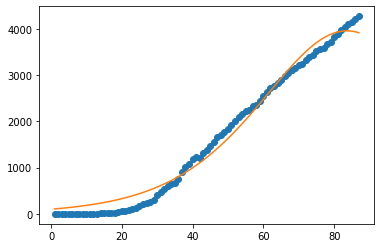

In [13]:
def fit_odeint(x, beta, gamma, S0, I0, R0, N):
    return integrate.odeint(func = sir_model, y0 = (S0, I0, R0), t = x, args=(beta, gamma, N))[:,1]



popt, pcov = optimize.curve_fit(f = fit_odeint, xdata = xdata, ydata = ydata, p0 = (0.1, 0.1, ydata[-1], 1, 0, 3989167), maxfev = 14000)
fitted = fit_odeint(xdata, *popt)

print(popt)


plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.show()

In [25]:
integrate.odeint?

Signature:
integrate.odeint(
    func,
    y0,
    t,
    args=(),
    Dfun=None,
    col_deriv=0,
    full_output=0,
    ml=None,
    mu=None,
    rtol=None,
    atol=None,
    tcrit=None,
    h0=0.0,
    hmax=0.0,
    hmin=0.0,
    ixpr=0,
    mxstep=0,
    mxhnil=0,
    mxordn=12,
    mxords=5,
    printmessg=0,
    tfirst=False,
)
Docstring:
Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the 

In [24]:
optimize.curve_fit?

Signature:
optimize.curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``

Parameters
----------
f : callable
    The model function, f(x, ...).  It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like or object
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, but can actually be any object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N).  If None, then the
    initial values will all be 1 (if the number of parameters for th